# Decision Trees: Examples : Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spkit.data import dataGen as ds
from spkit.ml import ClassificationTree

In [2]:
def get2DGrid(X,density=100):
    mn1,mn2 = np.min(X,axis=0)
    mx1,mx2 = np.max(X,axis=0)
    x1 = np.linspace(mn1,mx1,density)
    x2 = np.linspace(mn2,mx2,density)
    x1,x2 = np.meshgrid(x1,x2)
    Xt = np.c_[x1.flatten(),x2.flatten()]
    return Xt

def plotXy(X,y,ax=None,m='o',alpha=0.2):
    clr = ['b','r','g','y','m','k']
    cls = np.unique(y)
    for i in range(len(cls)):
        c = cls[i]
        ax.plot(X[y==c,0],X[y==c,1],m+clr[i],alpha=alpha)

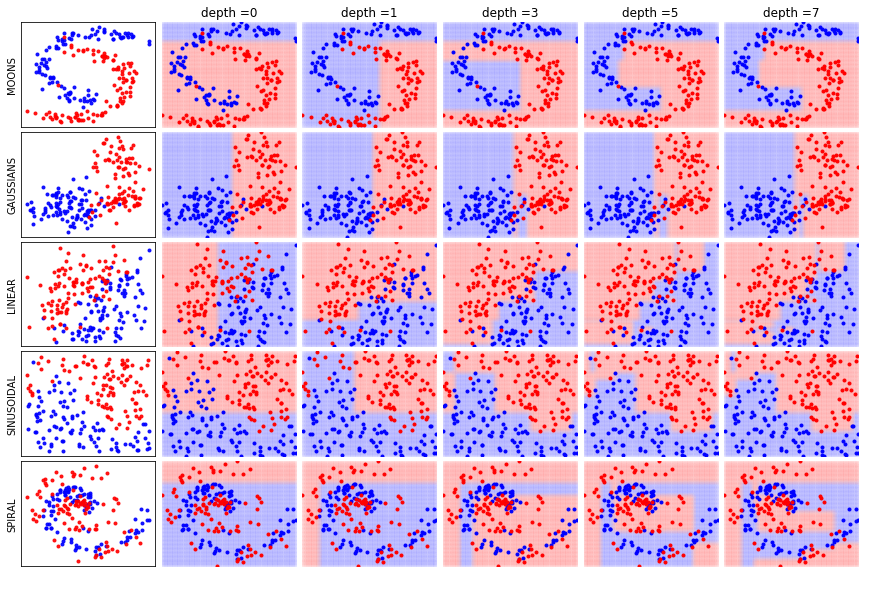

In [3]:
dType=['MOONS', 'GAUSSIANS', 'LINEAR', 'SINUSOIDAL', 'SPIRAL']

plt.figure(figsize=(15,10))

for k in range(len(dType)):
    dtype = dType[k]
    X,y,_ = ds.create_dataset(N=200, Dtype=dtype, noise=0.01)
    Xt    = get2DGrid(X,density=80)
    mns = np.min(Xt,axis=0)
    mxs = np.max(Xt,axis=0)



    depths = [0,1,3,5,7]
    N = len(depths)+1

    
    plt.subplot(5,N,k*N+1)
    plotXy(X,y,ax=plt,m='.',alpha=0.9)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(dtype)

    for i in range(len(depths)):
        d = depths[i]
        clf = ClassificationTree(max_depth=d)
        clf.fit(X,y,verbose=0,feature_names=['x1','x2'])
        yt = clf.predict(Xt)
        yp = clf.predict(X)
        acc = np.around(np.mean(y==yp),2)
        plt.subplot(5,N,k*N+i+2)
        #clf.plotTree(show=False,DiffBranchColor=True,scale=True,showtitle=False, showDirection=False,legend=False)
        #plt.subplot(2,1,2)
        plotXy(Xt,yt,ax=plt,m='o',alpha=0.02)
        plotXy(X,y,ax=plt,m='.',alpha=0.99)
        plt.xlim([mns[0],mxs[0]])
        plt.ylim([mns[1],mxs[1]])
        plt.axis('off')
        if k==0: plt.title('depth ='+str(d))

        #plt.subplot(2,N,N+i+2)
        #clf.plotTree(show=False,DiffBranchColor=True,scale=True,showtitle=False, showDirection=False,legend=False)
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)
plt.savefig('trees.png',dpi=300,transparent=False,bbox_inches='tight',pad_inches=0.01)
plt.show()

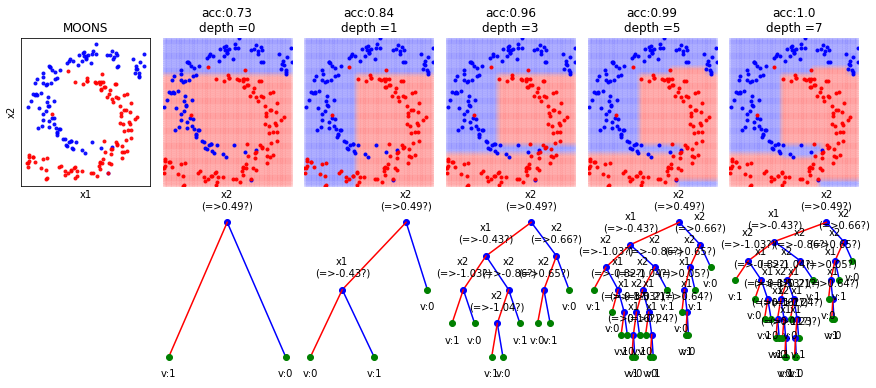

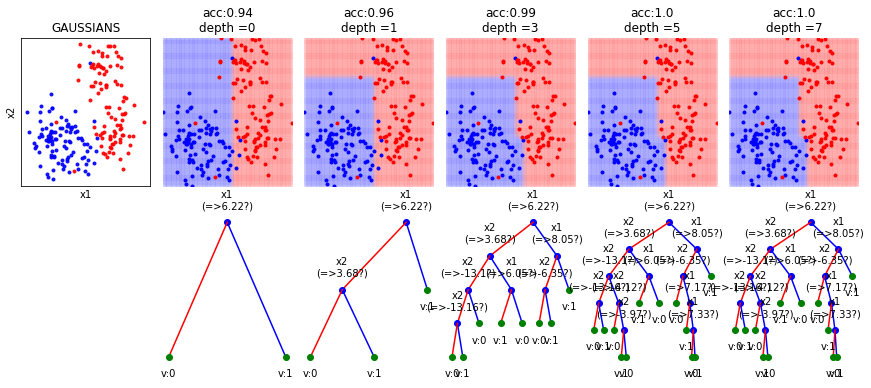

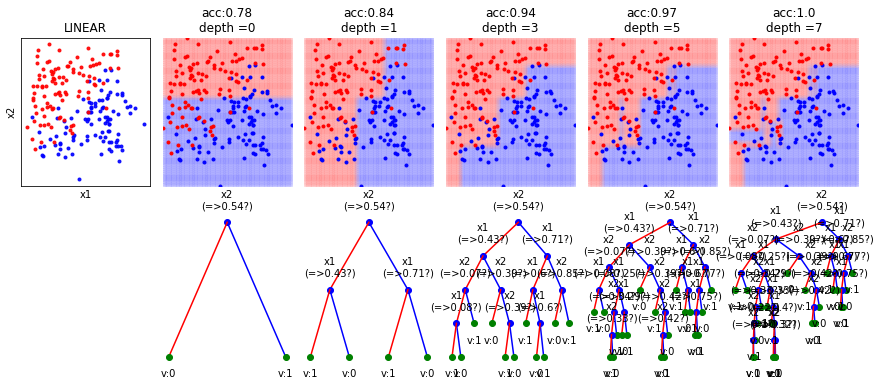

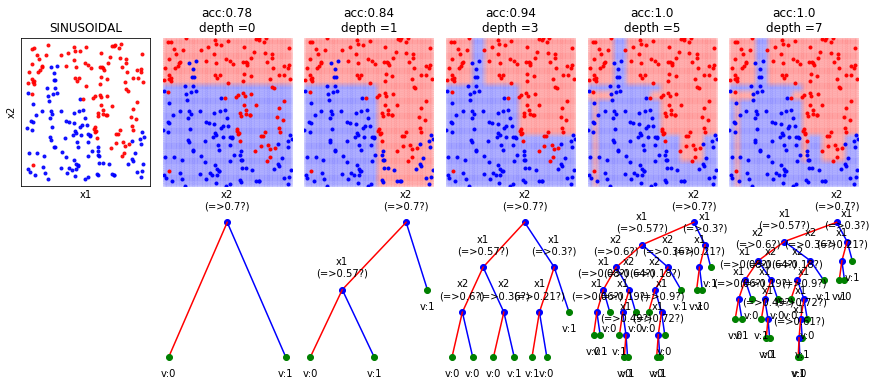

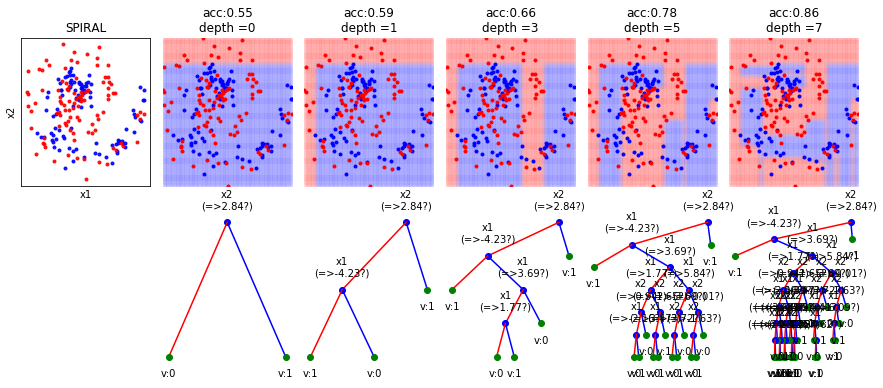

In [4]:
dType=['MOONS', 'GAUSSIANS', 'LINEAR', 'SINUSOIDAL', 'SPIRAL']
for k in range(len(dType)):
    dtype = dType[k]
    X,y,_ = ds.create_dataset(N=200, Dtype=dtype, noise=0.01)
    Xt    = get2DGrid(X,density=80)
    mns = np.min(Xt,axis=0)
    mxs = np.max(Xt,axis=0)



    depths = [0,1,3,5,7]
    N = len(depths)+1

    plt.figure(figsize=(15,6))
    plt.subplot(2,N,1)
    plotXy(X,y,ax=plt,m='.',alpha=0.9)
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(dtype)

    for i in range(len(depths)):
        d = depths[i]
        clf = ClassificationTree(max_depth=d)
        clf.fit(X,y,verbose=0,feature_names=['x1','x2'])
        yt = clf.predict(Xt)
        yp = clf.predict(X)
        acc = np.around(np.mean(y==yp),2)
        plt.subplot(2,N,i+2)
        #clf.plotTree(show=False,DiffBranchColor=True,scale=True,showtitle=False, showDirection=False,legend=False)
        #plt.subplot(2,1,2)
        plotXy(Xt,yt,ax=plt,m='o',alpha=0.03)
        plotXy(X,y,ax=plt,m='.',alpha=0.99)
        plt.xlim([mns[0],mxs[0]])
        plt.ylim([mns[1],mxs[1]])
        plt.axis('off')
        plt.title('acc:'+str(acc)+'\ndepth ='+str(d))

        plt.subplot(2,N,N+i+2)
        clf.plotTree(show=False,DiffBranchColor=True,scale=True,showtitle=False, showDirection=False,legend=False)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
    #plt.savefig('figures/tree_'+dtype.lower()+'3.png',dpi=300,transparent=False,bbox_inches='tight',pad_inches=0.01)
    plt.show()